### Part 1: EDA and Preprocessing

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set()

In [8]:
# Read the data
df = pd.read_csv('../DATA/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


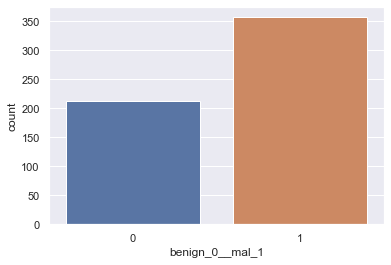

In [10]:
# Check if there is a class imbalance problem
sns.countplot(x='benign_0__mal_1',data=df)

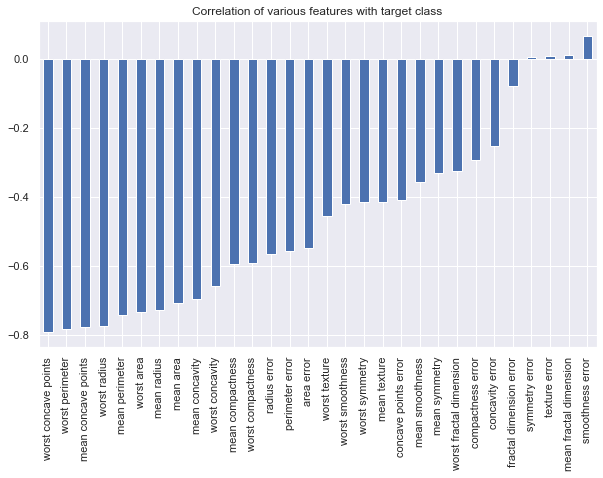

In [14]:
# Correlation
plt.figure(figsize=(10,6))
plt.title("Correlation of various features with target class")
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

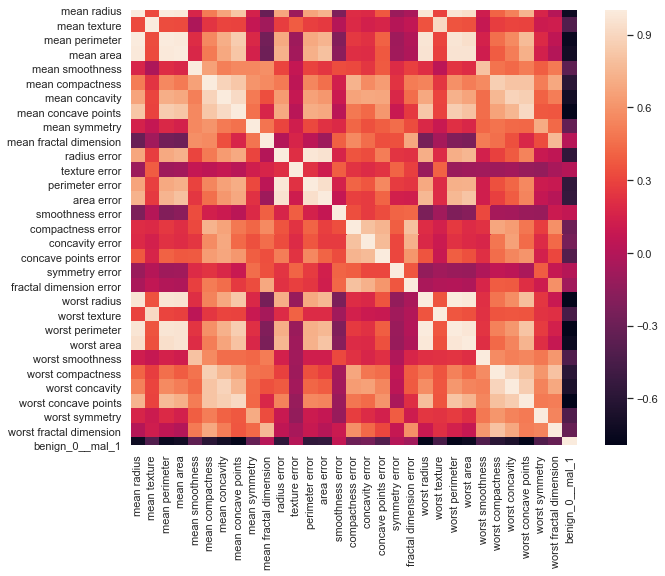

In [15]:
# Heatmap for correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [16]:
# Split
from sklearn.model_selection import train_test_split

X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Part 2: Creating the Model

In [18]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Since it is a binary classification, the last output activation should be Sigmoid
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [39]:
# Training phase
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6778 - val_loss: 0.6615
Epoch 2/600
426/426 [==============================] - 0s 120us/sample - loss: 0.6437 - val_loss: 0.6307
Epoch 3/600
426/426 [==============================] - 0s 119us/sample - loss: 0.6112 - val_loss: 0.5906
Epoch 4/600
426/426 [==============================] - 0s 119us/sample - loss: 0.5706 - val_loss: 0.5467
Epoch 5/600
426/426 [==============================] - 0s 115us/sample - loss: 0.5211 - val_loss: 0.4941
Epoch 6/600
426/426 [==============================] - 0s 115us/sample - loss: 0.4708 - val_loss: 0.4406
Epoch 7/600
426/426 [==============================] - 0s 116us/sample - loss: 0.4193 - val_loss: 0.3910
Epoch 8/600
426/426 [==============================] - 0s 120us/sample - loss: 0.3737 - val_loss: 0.3477
Epoch 9/600
426/426 [==============================] - 0s 106us/sample - loss: 0.3358 - val_loss: 0.3116
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0561 - val_loss: 0.1187
Epoch 79/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0542 - val_loss: 0.1125
Epoch 80/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0535 - val_loss: 0.1211
Epoch 81/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0538 - val_loss: 0.1139
Epoch 82/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0536 - val_loss: 0.1196
Epoch 83/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0530 - val_loss: 0.1155
Epoch 84/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0555 - val_loss: 0.1183
Epoch 85/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0554 - val_loss: 0.1241
Epoch 86/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0512 - val_loss: 0.1154
Epoch 87/600
426/426 [============================

Epoch 155/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0370 - val_loss: 0.1117
Epoch 156/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0366 - val_loss: 0.1159
Epoch 157/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0361 - val_loss: 0.1066
Epoch 158/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0367 - val_loss: 0.1152
Epoch 159/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0367 - val_loss: 0.1097
Epoch 160/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0361 - val_loss: 0.1136
Epoch 161/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0357 - val_loss: 0.1156
Epoch 162/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0445 - val_loss: 0.1125
Epoch 163/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0369 - val_loss: 0.1123
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 106us/sample - loss: 0.0258 - val_loss: 0.0999
Epoch 232/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0248 - val_loss: 0.1072
Epoch 233/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0242 - val_loss: 0.1065
Epoch 234/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0245 - val_loss: 0.1057
Epoch 235/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0235 - val_loss: 0.1059
Epoch 236/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0235 - val_loss: 0.1074
Epoch 237/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0256 - val_loss: 0.1085
Epoch 238/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0252 - val_loss: 0.1041
Epoch 239/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0230 - val_loss: 0.1013
Epoch 240/600
426/426 [==============================

Epoch 308/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0182 - val_loss: 0.0963
Epoch 309/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0149 - val_loss: 0.0966
Epoch 310/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0146 - val_loss: 0.0992
Epoch 311/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0151 - val_loss: 0.0956
Epoch 312/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0160 - val_loss: 0.0972
Epoch 313/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0145 - val_loss: 0.0959
Epoch 314/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0165 - val_loss: 0.0967
Epoch 315/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0159 - val_loss: 0.0914
Epoch 316/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0184 - val_loss: 0.0998
Epoch 317/600
426/426 [=================

Epoch 385/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0092 - val_loss: 0.1148
Epoch 386/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0095 - val_loss: 0.1183
Epoch 387/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0084 - val_loss: 0.1162
Epoch 388/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0084 - val_loss: 0.1092
Epoch 389/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0085 - val_loss: 0.1190
Epoch 390/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0087 - val_loss: 0.1126
Epoch 391/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0084 - val_loss: 0.1128
Epoch 392/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0080 - val_loss: 0.1190
Epoch 393/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0087 - val_loss: 0.1233
Epoch 394/600
426/426 [===================

Epoch 462/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0052 - val_loss: 0.1415
Epoch 463/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0069 - val_loss: 0.1390
Epoch 464/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0048 - val_loss: 0.1369
Epoch 465/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0054 - val_loss: 0.1366
Epoch 466/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0049 - val_loss: 0.1437
Epoch 467/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0050 - val_loss: 0.1284
Epoch 468/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0052 - val_loss: 0.1388
Epoch 469/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0041 - val_loss: 0.1323
Epoch 470/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0043 - val_loss: 0.1365
Epoch 471/600
426/426 [==============

426/426 [==============================] - 0s 109us/sample - loss: 0.0046 - val_loss: 0.1853
Epoch 539/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0036 - val_loss: 0.1509
Epoch 540/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0034 - val_loss: 0.1567
Epoch 541/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0029 - val_loss: 0.1564
Epoch 542/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0032 - val_loss: 0.1785
Epoch 543/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0024 - val_loss: 0.1717
Epoch 544/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0024 - val_loss: 0.1656
Epoch 545/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0022 - val_loss: 0.1669
Epoch 546/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0022 - val_loss: 0.1709
Epoch 547/600
426/426 [=============================

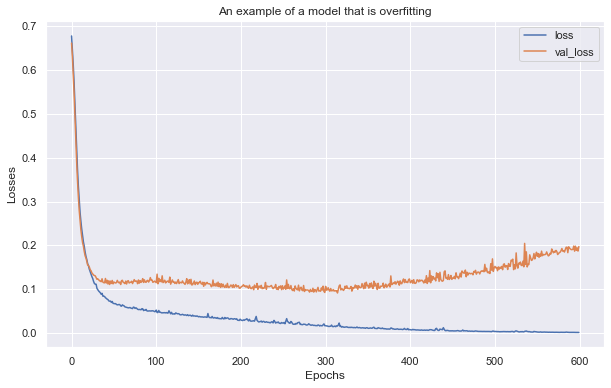

In [40]:
plt.figure(figsize=(10,6))
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label="loss")
plt.plot(losses['val_loss'],label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("An example of a model that is overfitting")
plt.legend()

<p>Example of overfitting - validation loss increases after 30-50 epochs while training loss is decreasing.</p>

In [41]:
# using early stopping to prevent overfitting
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Since it is a binary classification, the last output activation should be Sigmoid
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6654 - val_loss: 0.6427
Epoch 2/600
426/426 [==============================] - 0s 108us/sample - loss: 0.6252 - val_loss: 0.6030
Epoch 3/600
426/426 [==============================] - 0s 110us/sample - loss: 0.5815 - val_loss: 0.5531
Epoch 4/600
426/426 [==============================] - 0s 110us/sample - loss: 0.5319 - val_loss: 0.5010
Epoch 5/600
426/426 [==============================] - 0s 107us/sample - loss: 0.4806 - val_loss: 0.4472
Epoch 6/600
426/426 [==============================] - 0s 108us/sample - loss: 0.4303 - val_loss: 0.3968
Epoch 7/600
426/426 [==============================] - 0s 107us/sample - loss: 0.3840 - val_loss: 0.3502
Epoch 8/600
426/426 [==============================] - 0s 117us/sample - loss: 0.3425 - val_loss: 0.3094
Epoch 9/600
426/426 [==============================] - 0s 117us/sample - loss: 0.3079 - val_loss: 0.2741
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0578 - val_loss: 0.1107
Epoch 79/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0543 - val_loss: 0.1131
Epoch 80/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0530 - val_loss: 0.1106
Epoch 81/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0536 - val_loss: 0.1165
Epoch 82/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0539 - val_loss: 0.1116
Epoch 83/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0531 - val_loss: 0.1159
Epoch 84/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0525 - val_loss: 0.1139
Epoch 85/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0519 - val_loss: 0.1157
Epoch 86/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0529 - val_loss: 0.1179
Epoch 87/600
426/426 [===========================

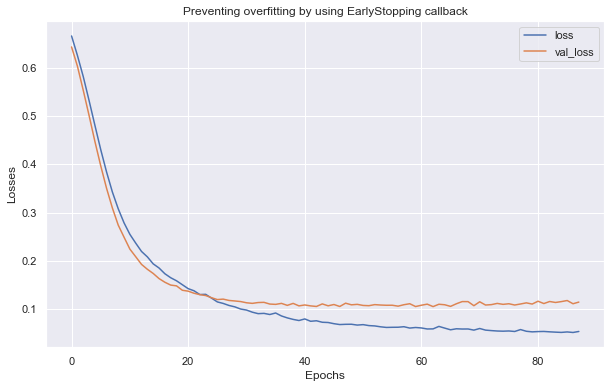

In [43]:
plt.figure(figsize=(10,6))
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label="loss")
plt.plot(losses['val_loss'],label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Preventing overfitting by using EarlyStopping callback")
plt.legend()

In [44]:
# Using dropout layers to prevent overfitting
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.3))

# Since it is a binary classification, the last output activation should be Sigmoid
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6917 - val_loss: 0.6738
Epoch 2/600
426/426 [==============================] - 0s 112us/sample - loss: 0.6656 - val_loss: 0.6516
Epoch 3/600
426/426 [==============================] - 0s 119us/sample - loss: 0.6433 - val_loss: 0.6321
Epoch 4/600
426/426 [==============================] - 0s 123us/sample - loss: 0.6305 - val_loss: 0.6108
Epoch 5/600
426/426 [==============================] - 0s 118us/sample - loss: 0.6020 - val_loss: 0.5816
Epoch 6/600
426/426 [==============================] - 0s 110us/sample - loss: 0.5861 - val_loss: 0.5468
Epoch 7/600
426/426 [==============================] - 0s 117us/sample - loss: 0.5543 - val_loss: 0.5060
Epoch 8/600
426/426 [==============================] - 0s 112us/sample - loss: 0.5187 - val_loss: 0.4680
Epoch 9/600
426/426 [==============================] - 0s 122us/sample - loss: 0.4921 - val_loss: 0.4297
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0838 - val_loss: 0.0871
Epoch 79/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0854 - val_loss: 0.0894
Epoch 80/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0845 - val_loss: 0.0929
Epoch 81/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0831 - val_loss: 0.0943
Epoch 82/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0750 - val_loss: 0.0971
Epoch 83/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0824 - val_loss: 0.0826
Epoch 84/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0763 - val_loss: 0.0970
Epoch 85/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0823 - val_loss: 0.1032
Epoch 86/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0874 - val_loss: 0.0904
Epoch 87/600
426/426 [========================

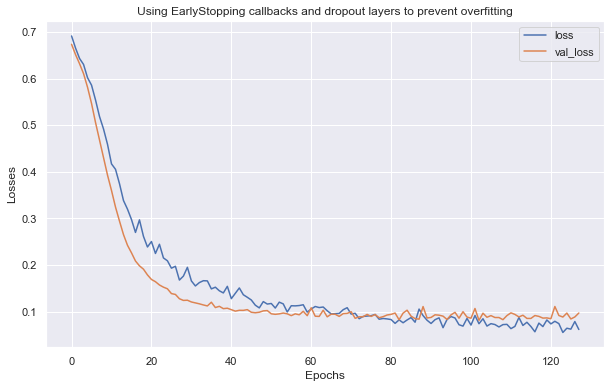

In [45]:
plt.figure(figsize=(10,6))
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label="loss")
plt.plot(losses['val_loss'],label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Using EarlyStopping callbacks and dropout layers to prevent overfitting")
plt.legend()

In [46]:
# Evaluation
predictions = model.predict_classes(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



[[54  1]
 [ 2 86]]
